In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Capacity 1

In [2]:
df = pd.read_csv('./drone_performance_on_obstacles.csv')

df.head()

,delivary_locations,drone_capacity,obstacles,obstacle_free_distance,with_obstacle_distance,distance_after_dp_relocation
0,20,1.0,5,126.981127,128.069106,127.652572
1,20,1.0,5,141.668799,141.911550,142.276957
2,20,1.0,5,176.704448,178.197319,176.814337
3,20,1.0,5,169.232127,170.302905,168.517190
4,20,1.0,5,148.602833,150.327215,152.370102


In [3]:
print("Average distance with no obstacle \t\t\t\t:", df[df['drone_capacity']==1]['obstacle_free_distance'].mean())
print("Average distance with obstacle avoidance \t\t\t:",df[df['drone_capacity']==1]['with_obstacle_distance'].mean())
print("Average distance with obstacle avoidance and relocation of dp \t:",df[df['drone_capacity']==1]['distance_after_dp_relocation'].mean())

Average distance with no obstacle 				: 195.92305333482676
Average distance with obstacle avoidance 			: 198.18392907180493
Average distance with obstacle avoidance and relocation of dp 	: 198.44522099859824


In [4]:
df_cap_1 = df[df['drone_capacity']==1]

df_cap_1.tail()

,delivary_locations,drone_capacity,obstacles,obstacle_free_distance,with_obstacle_distance,distance_after_dp_relocation
76,43,1.0,5,335.131151,343.349105,347.311566
77,40,1.0,5,272.460010,275.652331,276.531567
78,46,1.0,5,329.785339,330.791130,330.355481
79,20,1.0,5,137.514509,137.743737,137.852359
80,33,1.0,5,279.399624,282.217555,279.703375


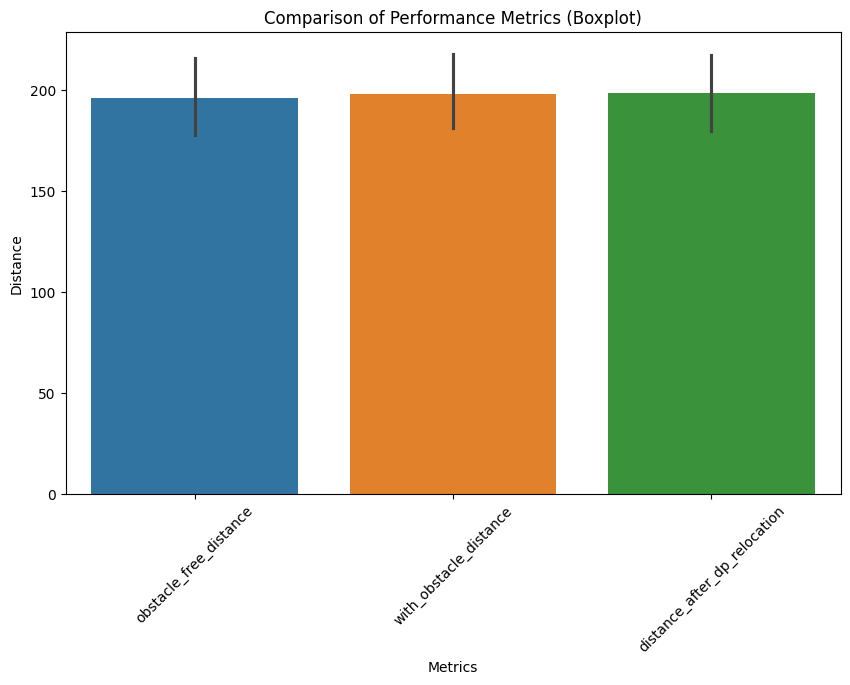

In [5]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_cap_1.iloc[:, -3:])
plt.title('Comparison of Performance Metrics (Boxplot)')
plt.xlabel('Metrics')
plt.ylabel('Distance')
plt.xticks(ticks=[0, 1, 2], labels=['obstacle_free_distance', 'with_obstacle_distance', 'distance_after_dp_relocation'], rotation=45)
plt.show()

c:\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


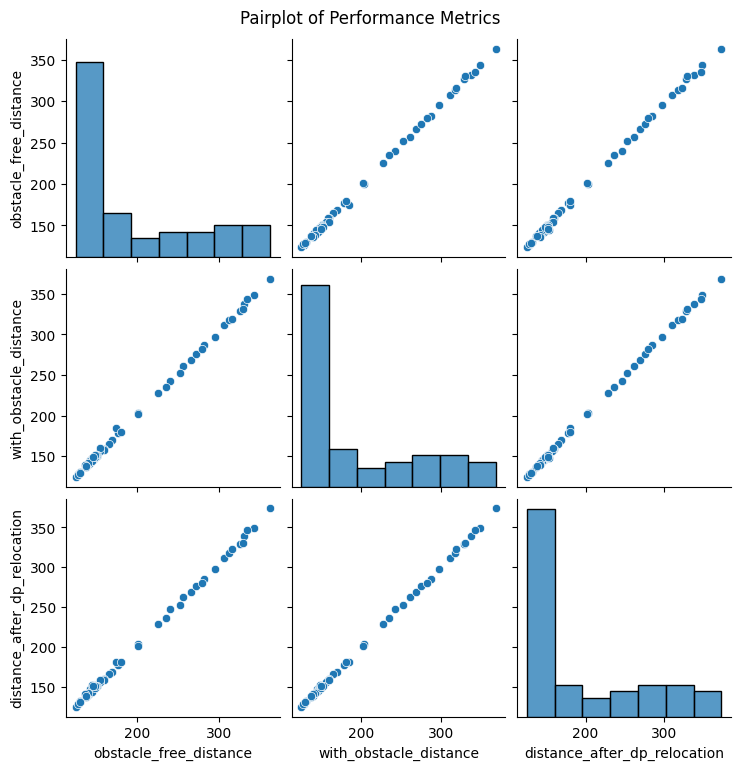

In [6]:
# Pairplot
sns.pairplot(df_cap_1.iloc[:, -3:])
plt.suptitle('Pairplot of Performance Metrics', y=1.02)
plt.show()

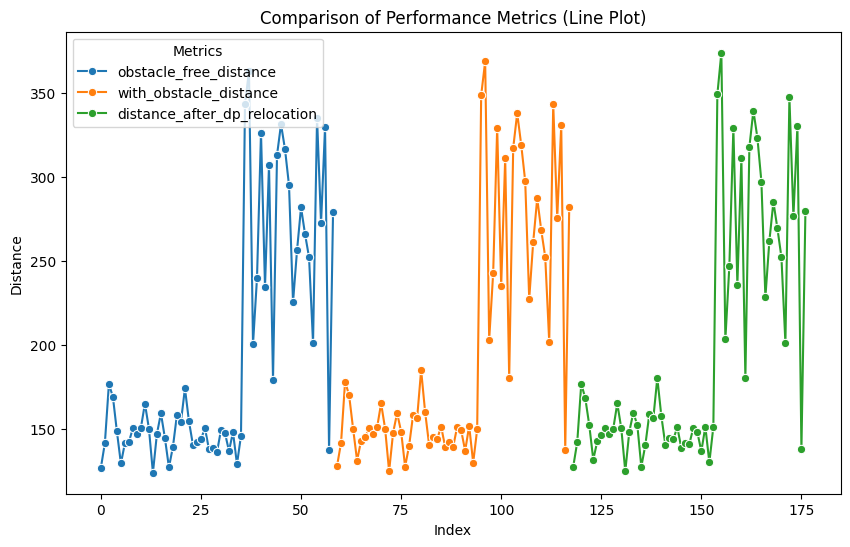

In [7]:
melted_df = df_cap_1.melt(value_vars=['obstacle_free_distance', 'with_obstacle_distance', 'distance_after_dp_relocation'],
                     var_name='Metrics', value_name='Distance')

# Line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=melted_df, x=melted_df.index, y='Distance', hue='Metrics', marker='o')
plt.title('Comparison of Performance Metrics (Line Plot)')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.legend(title='Metrics')
plt.show()

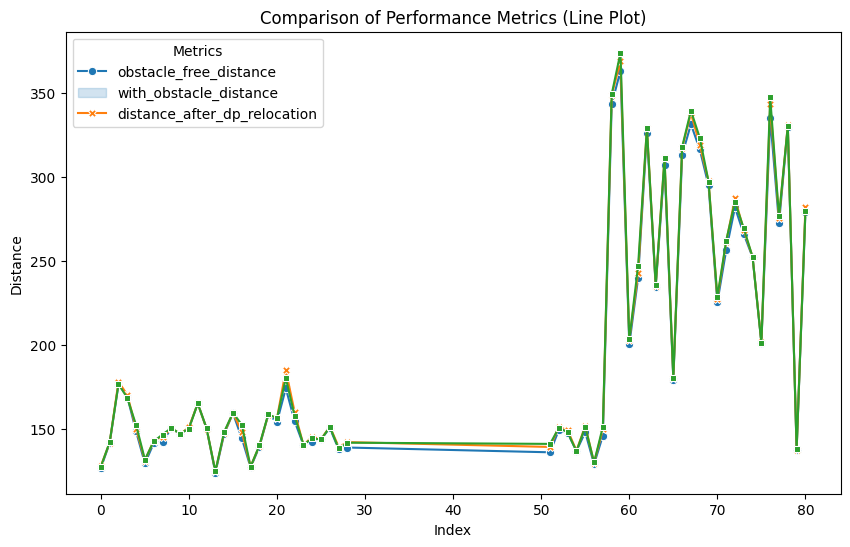

In [8]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_cap_1.iloc[:, -3:], dashes=False, markers=True)
plt.title('Comparison of Performance Metrics (Line Plot)')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.legend(title='Metrics', labels=['obstacle_free_distance', 'with_obstacle_distance', 'distance_after_dp_relocation'])
plt.show()

## Capacity K

In [9]:
df_cap_k = df[df['drone_capacity'] > 1]
df_cap_k = df_cap_k.drop('distance_after_dp_relocation', axis=1)
df_cap_k.head()

,delivary_locations,drone_capacity,obstacles,obstacle_free_distance,with_obstacle_distance
29,20,5.0,5,60.121870,60.818755
30,20,5.0,5,58.234078,58.306966
31,20,5.0,5,59.490894,59.490894
32,20,5.0,5,54.584135,55.651152
33,20,5.0,5,56.387633,56.778665


In [10]:
print("Average distance with no obstacle \t\t\t\t:", df_cap_k['obstacle_free_distance'].mean())
print("Average distance with obstacle avoidance \t\t\t:",df_cap_k['with_obstacle_distance'].mean())

Average distance with no obstacle 				: 86.85538334828078
Average distance with obstacle avoidance 			: 87.442055658859


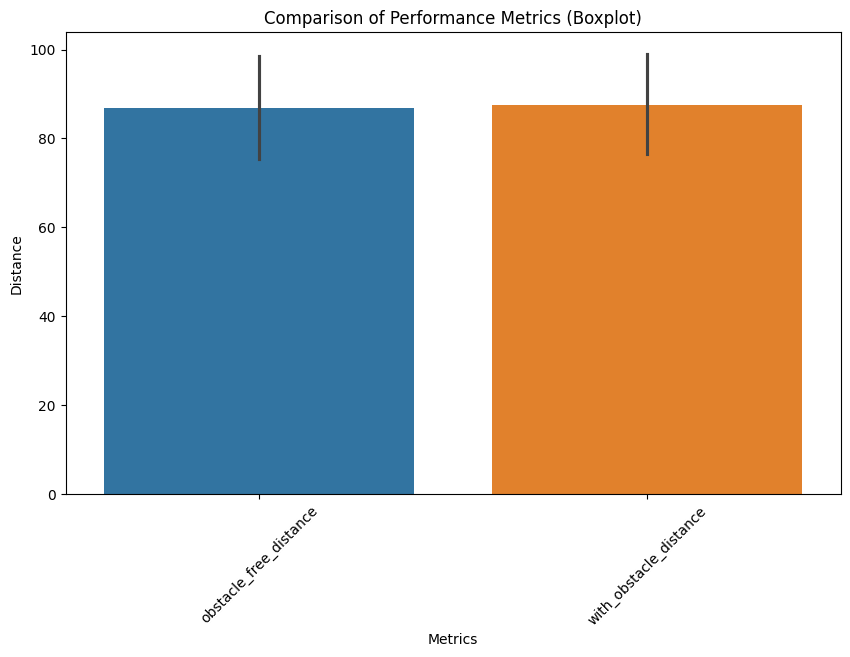

In [11]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_cap_k.iloc[:, -2:], estimator='mean')
plt.title('Comparison of Performance Metrics (Boxplot)')
plt.xlabel('Metrics')
plt.ylabel('Distance')
plt.xticks(ticks=[0, 1], labels=['obstacle_free_distance', 'with_obstacle_distance'], rotation=45)
plt.show()

c:\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


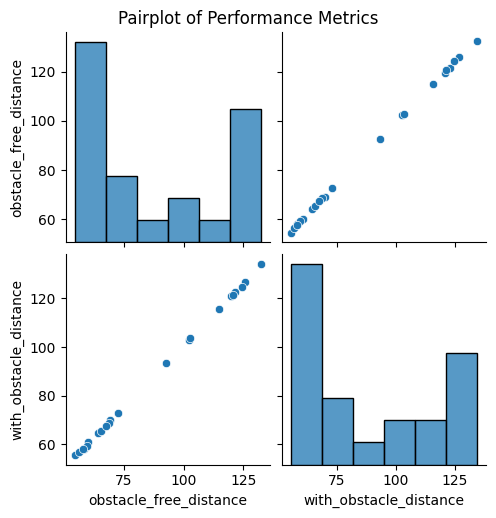

In [12]:
# Pairplot
sns.pairplot(df_cap_k.iloc[:, -2:])
plt.suptitle('Pairplot of Performance Metrics', y=1.02)
plt.show()

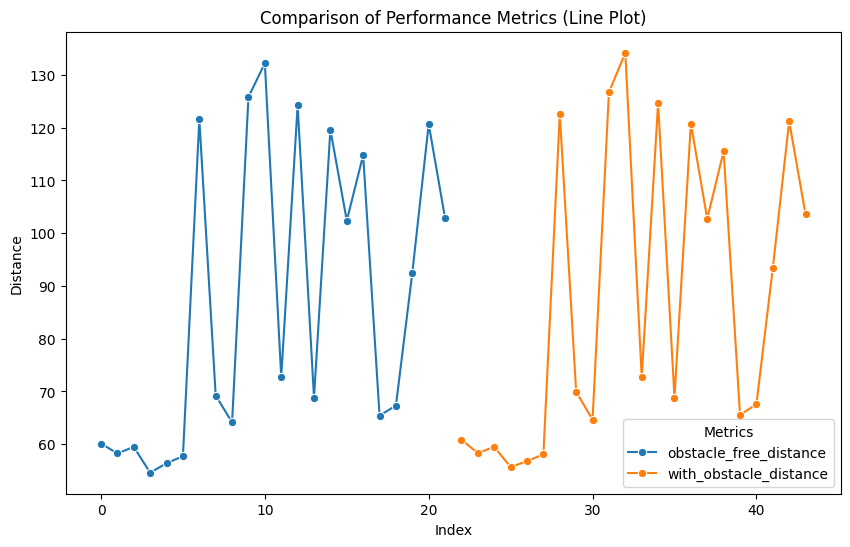

In [13]:
melted_df = df_cap_k.melt(value_vars=['obstacle_free_distance', 'with_obstacle_distance'],
                     var_name='Metrics', value_name='Distance')

# Line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=melted_df, x=melted_df.index, y='Distance', hue='Metrics', marker='o')
plt.title('Comparison of Performance Metrics (Line Plot)')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.legend(title='Metrics')
plt.show()

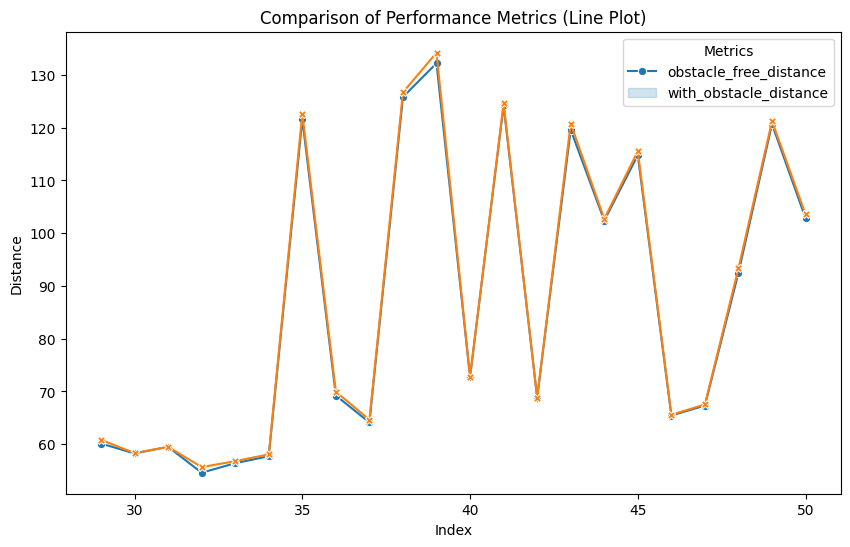

In [14]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_cap_k.iloc[:, -2:], dashes=False, markers=True)
plt.title('Comparison of Performance Metrics (Line Plot)')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.legend(title='Metrics', labels=['obstacle_free_distance', 'with_obstacle_distance'])
plt.show()